## pretty useful cause say u wanna predcict heating oio price using temp or other things
## VAR (1): a(t) = c*a(t-1) + c*b(t-1) + error(a(t))
##          b(t) = c*b(t-1) + c*a(t-1) + error(b(t))

## the simplification of the above equations is a matrix equation: f(t) = C*f(t-1) + error(t)

In [95]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
from statsmodels.tsa.api import VAR

In [96]:
df = pd.read_csv(r"ice_cream_vs_heater.csv")
df['Month'] = pd.to_datetime(df['Month'],format = '%Y-%m')
df = df.set_index('Month')
df = df.asfreq(pd.infer_freq(df.index))

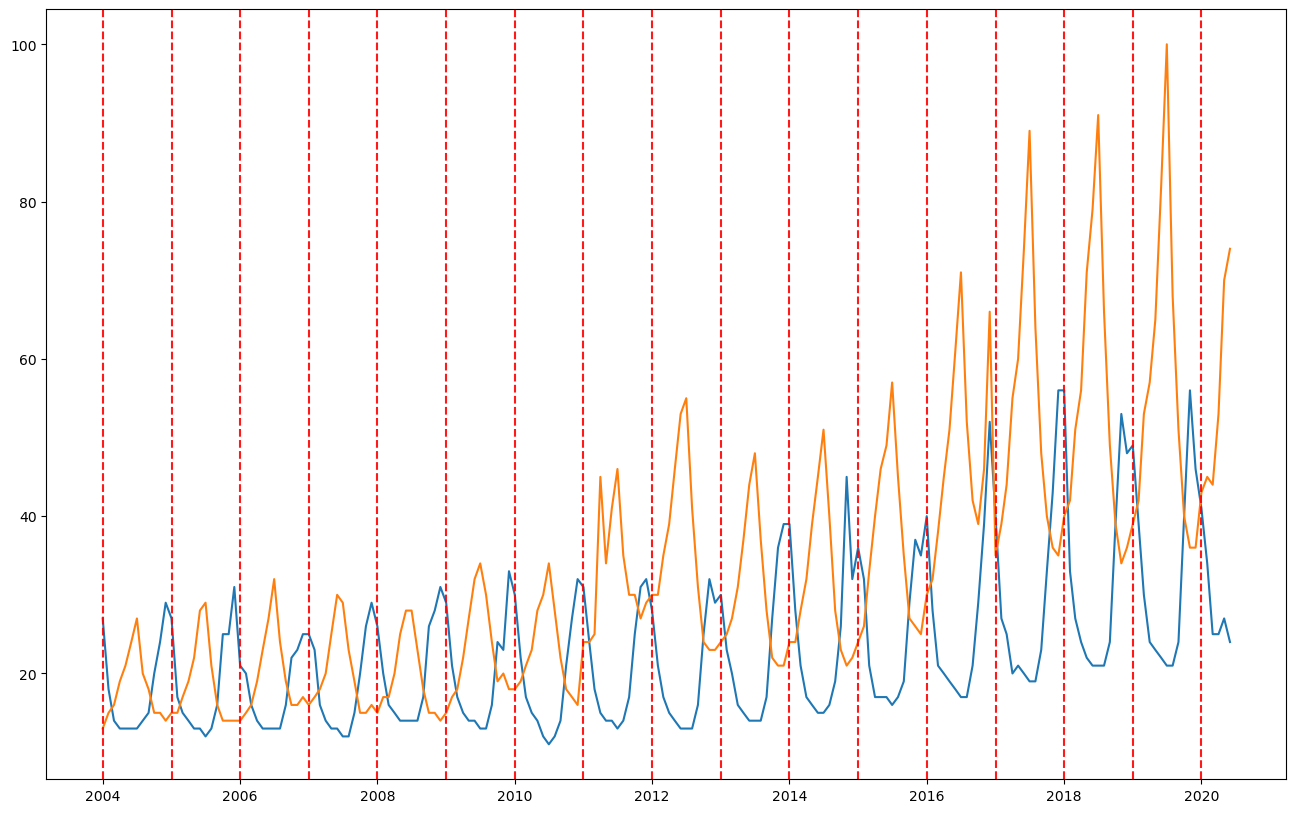

In [97]:
plt.figure(figsize=(16,10))
plt.plot(df["heater"])
plt.plot(df['ice cream'])

for year in range (2004,2021):
    plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

In [98]:
# mean_heat = df['heater'].mean()
# mean_ice = df['ice cream'].mean()

# df['heater'] = df['heater'] - mean_heat
# df['ice cream'] = df['ice cream'] - mean_heat

# plt.figure(figsize=(16,10))
# plt.plot(df["heater"])
# plt.plot(df['ice cream'])

# for year in range (2004,2021):
#     plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)


## Makes no sense to subtract the mean (doesn't help with stationarity)

In [99]:
# std_heat = df['heater'].std()
# std_ice = df['ice cream'].std()
# df['heater'] = df['heater'] / std_heat
# df['ice cream'] = df['ice cream'] / std_ice

# plt.figure(figsize=(16,10))
# plt.plot(df["heater"])
# plt.plot(df['ice cream'])

# for year in range (2004,2021):
#     plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

## Makes no sense to divide by the std (doesn't help with stationarity)

In [100]:
# std_heat = df['heater'].std()
# std_ice = df['ice cream'].std()
# mean_heat = df['heater'].mean()
# mean_ice = df['ice cream'].mean()
# df['heater'] = (df['heater'] - mean_heat) / std_heat
# df['ice cream'] = (df['ice cream'] - mean_ice) / std_ice

# plt.figure(figsize=(16,10))
# plt.plot(df["heater"])
# plt.plot(df['ice cream'])

# for year in range (2004,2021):
#     plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

## Makes no sense to do both (doesn't help with stationarity)

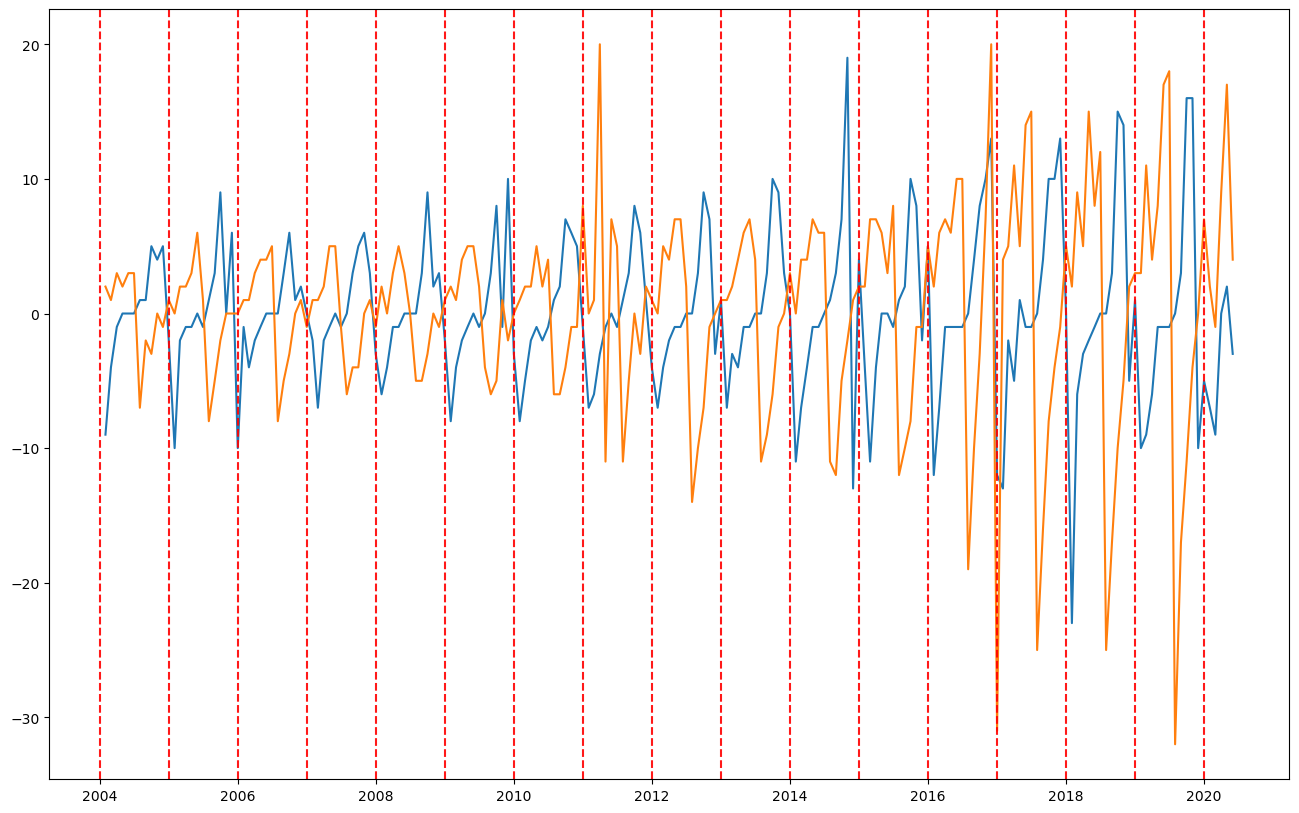

In [101]:
df = df.diff().dropna()

plt.figure(figsize=(16,10))
plt.plot(df["heater"])
plt.plot(df['ice cream'])

for year in range (2004,2021):
    plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

## Fisrt difference sorts for the constant mean constraint for stationarity

In [102]:
annual_vol_heat = df['heater'].groupby(df['heater'].index.year).std()
annual_vol_ice = df['ice cream'].groupby(df['ice cream'].index.year).std()

annual_vol_ice


Month
2004     3.144982
2005     3.668044
2006     3.887626
2007     3.396745
2008     3.128559
2009     3.773914
2010     3.613946
2011     8.554194
2012     6.653775
2013     5.734003
2014     6.444989
2015     6.903556
2016    10.130587
2017    14.926842
2018    12.101528
2019    14.403282
2020     6.314006
Name: ice cream, dtype: float64

In [103]:
vol_ice = df['ice cream'].index.map(lambda d: annual_vol_ice.loc[d.year])
vol_heat = df['heater'].index.map(lambda d: annual_vol_heat.loc[d.year])

vol_ice

Index([3.1449815724275862, 3.1449815724275862, 3.1449815724275862,
       3.1449815724275862, 3.1449815724275862, 3.1449815724275862,
       3.1449815724275862, 3.1449815724275862, 3.1449815724275862,
       3.1449815724275862,
       ...
       14.403282454168059, 14.403282454168059, 14.403282454168059,
       14.403282454168059,  6.314005596027506,  6.314005596027506,
        6.314005596027506,  6.314005596027506,  6.314005596027506,
        6.314005596027506],
      dtype='float64', name='Month', length=197)

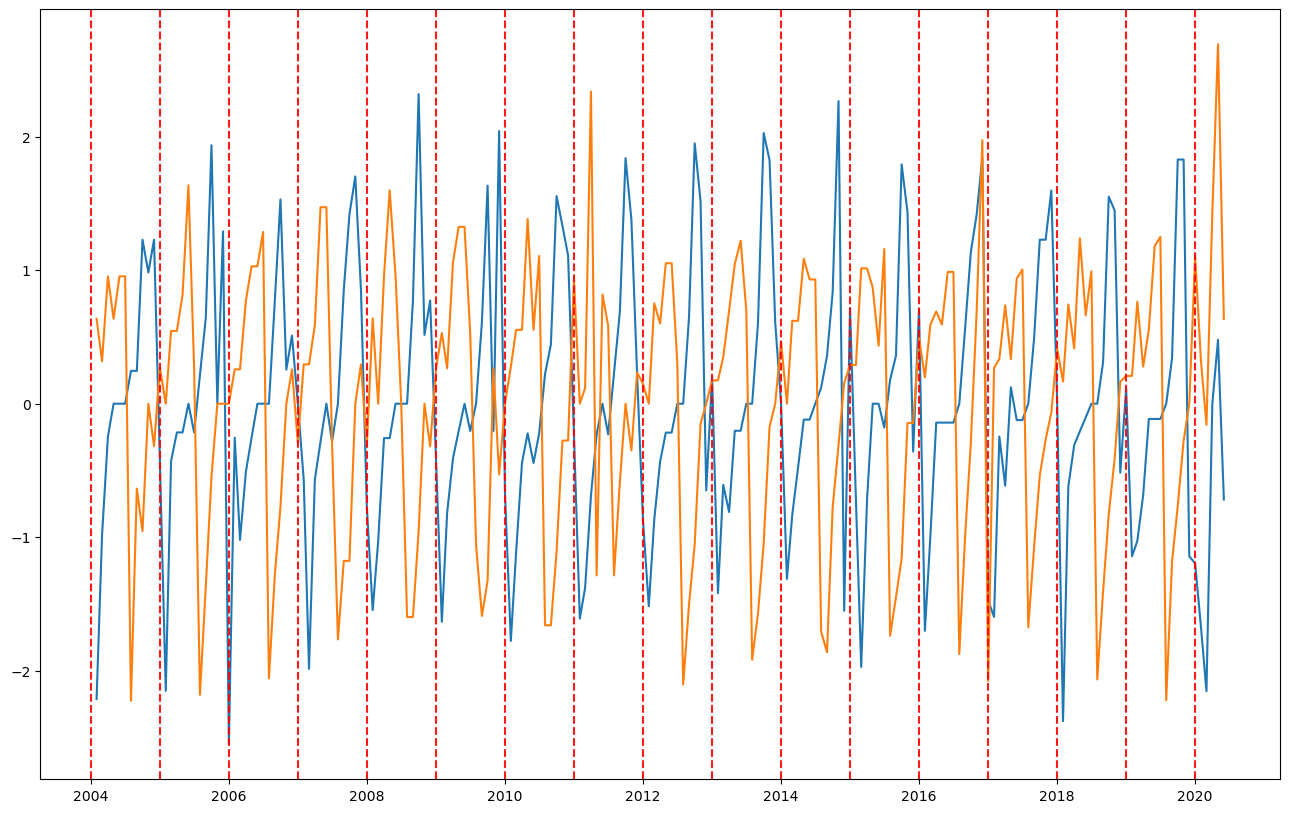

In [104]:
df["heater"] = df['heater'] / vol_heat
df['ice cream'] = df['ice cream'] / vol_ice

plt.figure(figsize=(16,10))
plt.plot(df["heater"])
plt.plot(df['ice cream'])

for year in range (2004,2021):
    plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

## Dividing every observation by the annual volatility sorted the constant volatility constraint for stationarity

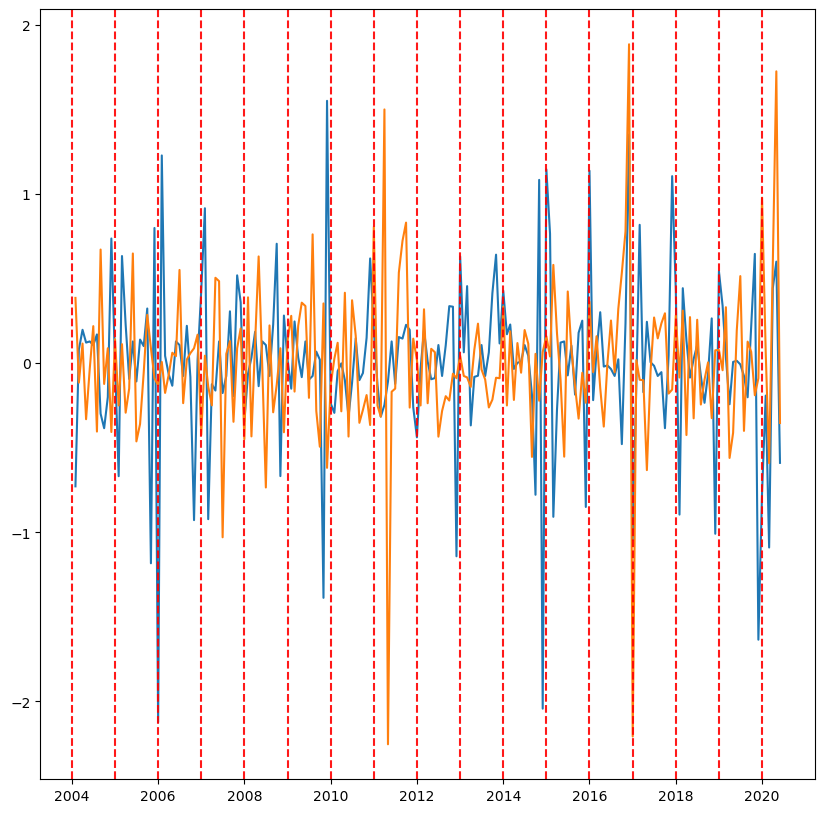

In [105]:
monthly_mean_heat = df['heater'].groupby(df.index.month).mean()
monthly_mean_ice = df['ice cream'].groupby(df.index.month).mean()
monthly_mean_heat_mapped = df['heater'].index.map(lambda d: monthly_mean_heat.loc[d.month])
monthly_mean_ice_mapped = df['ice cream'].index.map(lambda d: monthly_mean_ice.loc[d.month])

df["heater"] = df['heater'] - monthly_mean_heat_mapped
df['ice cream'] = df['ice cream'] - monthly_mean_ice_mapped

plt.figure(figsize=(10,10))
plt.plot(df["heater"])
plt.plot(df['ice cream'])

for year in range (2004,2021):
    plt.axvline(datetime(year,1,1), linestyle = '--', color = 'r', alpha = 0.9)

## Taking the monthly mean from each observation sorted the pattern constraint for stationariy

## Below you have VAR (vector auto regression) whihc basically wants to model the prediction of one series based on previous observations of the series itself and the previous observations of another series (this is quite powerful)

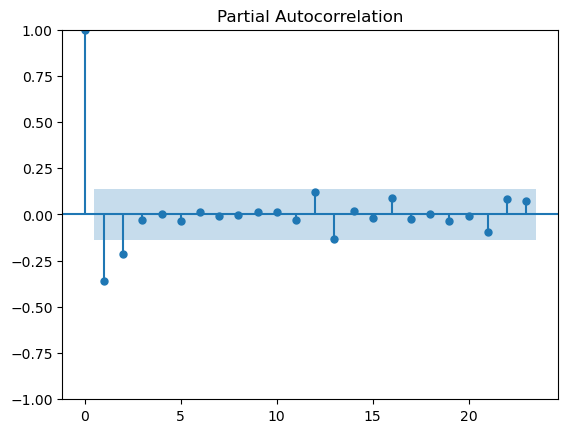

In [106]:
plot_pacf(df['heater'])
plt.show()

In [107]:
for lag in range(1, 14):
    heather_series = df['heater'].iloc[lag:]
    lagged_ice_cream_series = df['ice cream'].iloc[:-lag]
    print('Lag: %s'%lag) #not the point but smart
    print(pearsonr(heather_series, lagged_ice_cream_series))
    print("\n")
#the slicing is don ok and that is to: This alignment allows us to compute the correlation between 'ice cream' sales at an earlier time and 'heater' sales at a later time, thus identifying any lagged relationship.

Lag: 1
PearsonRResult(statistic=-0.03154450742591568, pvalue=0.6607284991749396)


Lag: 2
PearsonRResult(statistic=-0.09872703210944639, pvalue=0.16970841905089779)


Lag: 3
PearsonRResult(statistic=-0.0017838553789235392, pvalue=0.9803056762960982)


Lag: 4
PearsonRResult(statistic=0.060239718598255394, pvalue=0.4052979832528621)


Lag: 5
PearsonRResult(statistic=-0.05403486448015027, pvalue=0.45664426275056885)


Lag: 6
PearsonRResult(statistic=0.06461183026553834, pvalue=0.3745300043445426)


Lag: 7
PearsonRResult(statistic=-0.04949334618415861, pvalue=0.4976876685762092)


Lag: 8
PearsonRResult(statistic=0.07890837135977344, pvalue=0.28045489704330595)


Lag: 9
PearsonRResult(statistic=-0.053235016996004234, pvalue=0.4681034202228026)


Lag: 10
PearsonRResult(statistic=0.029536989060791153, pvalue=0.6882054906333319)


Lag: 11
PearsonRResult(statistic=-0.059795363515225686, pvalue=0.4175217420485689)


Lag: 12
PearsonRResult(statistic=-0.07513046035981788, pvalue=0.3094409252542680

## left is the correlation right is the significance of the correlation (i.e., the p value)

## You see that at lag 13 the p value is very low so it is very significant and that is why you set maxlags=13

In [108]:
df = df[['ice cream', 'heater']]
model = VAR(df)
model_fit = model.fit(maxlags=13) # 13 for both time series. it takes all the 13 lags for both series to derive the predicted thing you want like heather or ice cream and that is also why you have these 2 in the results for equation
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Aug, 2024
Time:                     00:04:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.92349
Nobs:                     184.000    HQIC:                  -2.48459
Log likelihood:          -204.405    FPE:                  0.0571123
AIC:                     -2.86700    Det(Omega_mle):       0.0434311
--------------------------------------------------------------------
Results for equation ice cream
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.016054         0.034105           -0.471           0.638
L1.ice cream         -0.287811         0.079633           -3.614           0.000
L1.heater            -0.121251         0.073673         

## Prob = p value. So our final model for the heater taking into account very samll values of p so not just less than 0.5 althoug that is the norm but here we overlook stuff (get the idea of p<0.5 is ok) is: h(t) = -0.41 * h(t-1) - 0.17 * i(t-2) - 0.19 * h(t-2) - 0.11 * i(t-12) + 0.2 * i(t-13) - 0.16 h(t-13) (look at the last stuff and for the respective Ls)